<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#All-imports-necessary" data-toc-modified-id="All-imports-necessary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>All imports necessary</a></span></li><li><span><a href="#Read-the-data" data-toc-modified-id="Read-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read the data</a></span><ul class="toc-item"><li><span><a href="#Where-are-we-at-the-moment" data-toc-modified-id="Where-are-we-at-the-moment-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Where are we at the moment</a></span></li><li><span><a href="#Get-the-subset-of-folders-for-target-subcorpus-(Voice-of-America)" data-toc-modified-id="Get-the-subset-of-folders-for-target-subcorpus-(Voice-of-America)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Get the subset of folders for target subcorpus (Voice of America)</a></span></li><li><span><a href="#Read-subcorpus" data-toc-modified-id="Read-subcorpus-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Read subcorpus</a></span></li></ul></li><li><span><a href="#Tags-count-per-each-word" data-toc-modified-id="Tags-count-per-each-word-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tags count per each word</a></span></li><li><span><a href="#Lemma-length-distribution" data-toc-modified-id="Lemma-length-distribution-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Lemma length distribution</a></span></li><li><span><a href="#Stop-words-and-punctuation" data-toc-modified-id="Stop-words-and-punctuation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Stop-words and punctuation</a></span></li><li><span><a href="#Token-shape" data-toc-modified-id="Token-shape-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Token shape</a></span></li><li><span><a href="#Is-the-token-titled-or-not?" data-toc-modified-id="Is-the-token-titled-or-not?-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Is the token titled or not?</a></span></li><li><span><a href="#Is-the-token-purely-alphabetic-or-not?" data-toc-modified-id="Is-the-token-purely-alphabetic-or-not?-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Is the token purely alphabetic or not?</a></span></li><li><span><a href="#Calculate-some-statistics" data-toc-modified-id="Calculate-some-statistics-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Calculate some statistics</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# All imports necessary

In [1]:
import sys
import warnings

In [2]:
sys.path.append('..')
warnings.filterwarnings("ignore")

In [3]:
from source.code.utils.utils import filter_by_subcorpus
from source.code.utils.utils import get_tagged_texts_as_pd

In [4]:
from source.code.utils.preprocessing import additional_features
from source.code.utils.preprocessing import iob3bio
from source.code.utils.preprocessing import filtrations

In [5]:
import os
import numpy as np
import pandas as pd

In [6]:
import matplotlib.pyplot as plt

In [7]:
from nltk.corpus import stopwords

In [8]:
from matplotlib_venn import venn2

In [9]:
import seaborn as sns

In [10]:
from tqdm.autonotebook import tqdm

In [11]:
import string

In [77]:
import scipy.stats as stats

In [12]:
sns.set(color_codes=True)

In [13]:
sns.set(font_scale=2)

In [14]:
%matplotlib inline

# Read the data

## Where are we at the moment

In [15]:
! pwd

/home/bender/PycharmProjects/NLP/notebooks


In [16]:
! ls -alth ../data/datasets/gmb-2.2.0/

итого 253M
drwxrwxr-x.   4 bender bender 4,0K окт  7 16:35 ..
-rw-rw-r--.   1 bender bender 177M сен 30 15:56 en.tags.pd.extracted.csv
drwxr-x---.   4 bender bender 4,0K сен 30 15:56 .
-rw-rw-r--.   1 bender bender  76M сен 27 02:43 en.raw.extracted.npy
-rw-r-----.   1 bender bender 7,4K июл  4  2014 README
-rw-rw-r--.   1 bender bender 2,0K июл  4  2014 NEWS
-rw-r-----.   1 bender bender  497 июл  2  2014 THANKS
drwxr-x---. 102 bender bender 4,0K июл  2  2014 data
-rw-r-----.   1 bender bender  279 июн 23  2014 LICENSE
drwxr-x---.   2 bender bender 4,0K авг 21  2013 doc


## Get the subset of folders for target subcorpus (Voice of America)

In [17]:
target_subcorpus_folders = filter_by_subcorpus('../data/datasets/gmb-2.2.0/', 'subcorpus: Voice of America')

## Read subcorpus

Let's read the data and take a look at what's happening there:

In [18]:
tagged_texts_as_pd = get_tagged_texts_as_pd(target_subcorpus_folders, '../data/datasets/gmb-2.2.0/')

In [19]:
tagged_texts_as_pd.head()

,token,pos_tag,lemma,ner_tag,word_net_sense_number,verb_net_roles,semantic_relation,animacy_tag,super_tag,lambda_dsr
0,Former,JJ,former,O,1,[Topic],O,O,N/N,"lam(v1,lam(v2,merge(b1:drs([b1:[]:s1],[b1:[]:r..."
1,Ecuadorean,NNP,ecuadorean,O,0,[],=,Human,N/N,"lam(v1,lam(v2,merge(b1:drs([b1:[]:x1],[b1:[100..."
2,President,NNP,president,per-tit,1,[],=,Human,N/N,"lam(v1,lam(v2,merge(b1:drs([b1:[]:x1],[b1:[100..."
3,Lucio,NNP,lucio,per-nam,0,[],=,Human,N/N,"lam(v1,lam(v2,merge(b1:drs([b1:[]:x1],[b1:[100..."
4,Gutierrez,NNP,gutierrez,per-nam,0,[],O,Human,N,"lam(v1,b1:drs([],[b1:[1005]:named(v1,gutierrez..."


In [20]:
tagged_texts_as_pd.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231279 entries, 0 to 1231278
Data columns (total 10 columns):
token                    1231279 non-null object
pos_tag                  1231279 non-null object
lemma                    1231279 non-null object
ner_tag                  1231279 non-null object
word_net_sense_number    1231279 non-null object
verb_net_roles           1231279 non-null object
semantic_relation        1231279 non-null object
animacy_tag              1231279 non-null object
super_tag                1227215 non-null object
lambda_dsr               1227215 non-null object
dtypes: object(10)
memory usage: 93.9+ MB


In [21]:
tagged_texts_as_pd = tagged_texts_as_pd[['token', 'pos_tag', 'lemma', 'ner_tag']]

In [22]:
tagged_texts_as_pd.head()

,token,pos_tag,lemma,ner_tag
0,Former,JJ,former,O
1,Ecuadorean,NNP,ecuadorean,O
2,President,NNP,president,per-tit
3,Lucio,NNP,lucio,per-nam
4,Gutierrez,NNP,gutierrez,per-nam


In [23]:
tagged_texts_as_pd.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231279 entries, 0 to 1231278
Data columns (total 4 columns):
token      1231279 non-null object
pos_tag    1231279 non-null object
lemma      1231279 non-null object
ner_tag    1231279 non-null object
dtypes: object(4)
memory usage: 37.6+ MB


Let's take a look at what NER-tag we have:

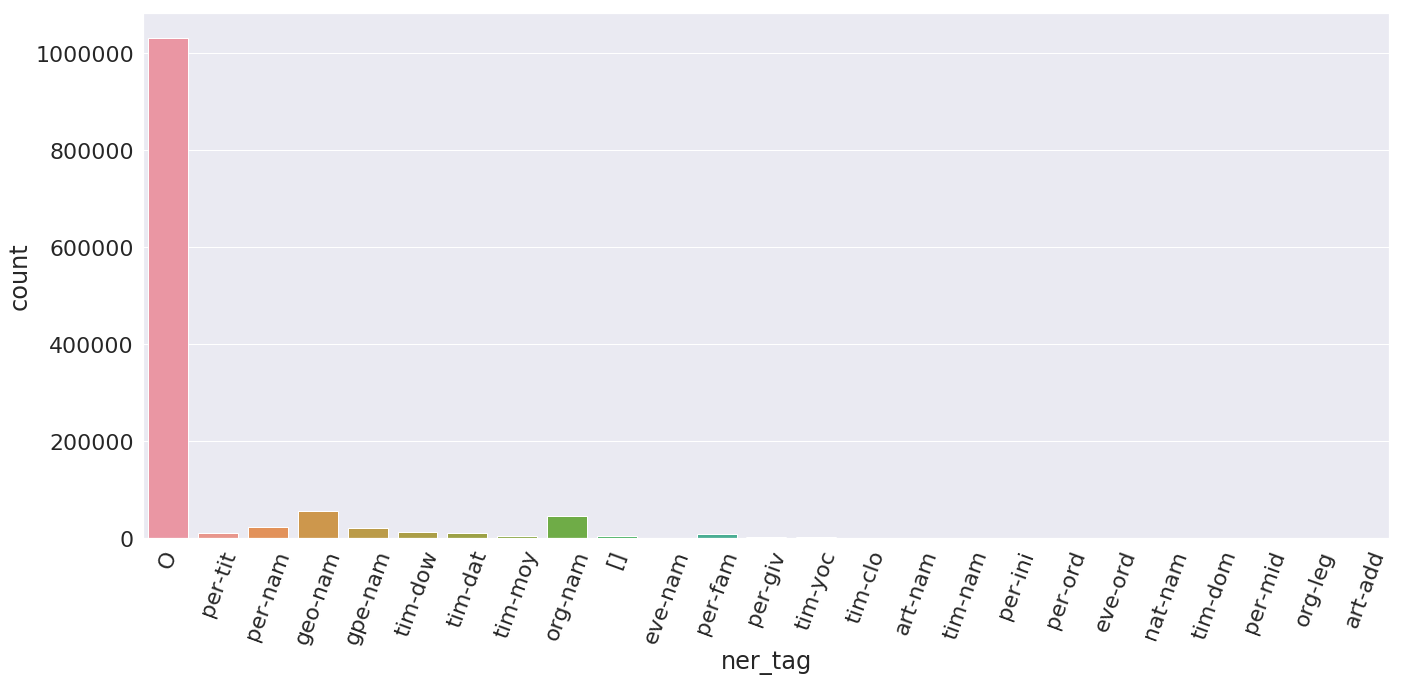

In [24]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 10))
ax = sns.countplot('ner_tag', data=tagged_texts_as_pd)
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="center")
plt.tight_layout()
plt.show()

Too many 'O' tags.

Let's try to build a distribution without them:

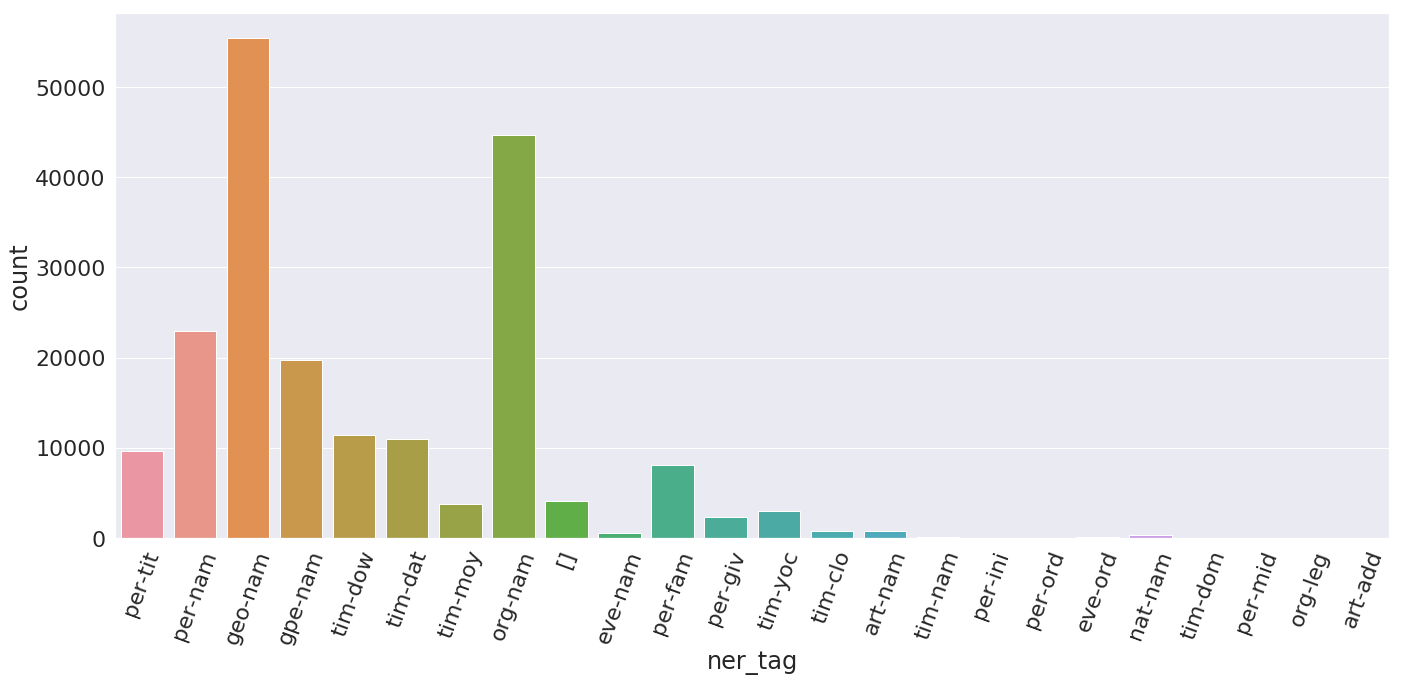

In [25]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 10))
ax = sns.countplot('ner_tag', data=tagged_texts_as_pd[tagged_texts_as_pd.ner_tag != 'O'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="center")
plt.tight_layout()
plt.show()

What is the '[]'?

Let's take a look at words whith this tag:

In [26]:
tagged_texts_as_pd[tagged_texts_as_pd.ner_tag == '[]'].head()

,token,pos_tag,lemma,ner_tag
184,\tLQU\t,O,0,[]
189,\tLQU\t,O,0,[]
1068,\tLQU\t,O,0,[]
1071,\tRQU\t,O,0,[]
1903,\tLQU\t,O,0,[]


In [27]:
tagged_texts_as_pd[tagged_texts_as_pd.ner_tag == '[]'].token.value_counts()

\tLQU\t    3024
\tRQU\t    1039
LQU\t         1
Name: token, dtype: int64

In [28]:
tagged_texts_as_pd[tagged_texts_as_pd.ner_tag == '[]'].pos_tag.value_counts()

O          3983
org-nam      37
per-nam      27
geo-nam      11
tim-dat       6
Name: pos_tag, dtype: int64

In [29]:
tagged_texts_as_pd[tagged_texts_as_pd.ner_tag == '[]'].lemma.value_counts()

0    4064
Name: lemma, dtype: int64

Well, seems like it's just some trash.

It will be dropped out of the data in filtration function.

now let's just get rid of it here:

In [30]:
tagged_texts_as_pd = tagged_texts_as_pd[tagged_texts_as_pd.ner_tag != '[]']

Let's also transform our tags into BIO-format:

In [31]:
tagged_texts_as_pd.ner_tag = iob3bio(tagged_texts_as_pd.ner_tag.values)

Okay, hot does it look like now:

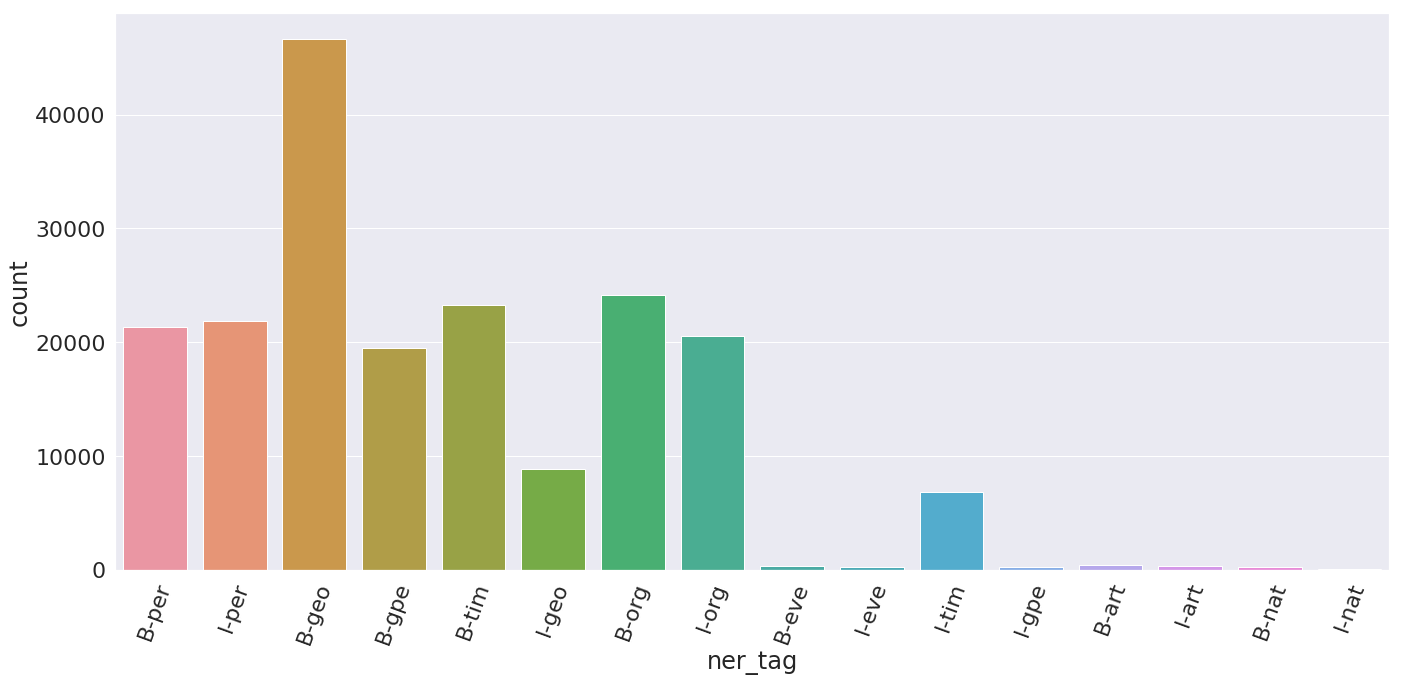

In [32]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 10))
ax = sns.countplot('ner_tag', data=tagged_texts_as_pd[tagged_texts_as_pd.ner_tag != 'O'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="center")
plt.tight_layout()
plt.show()

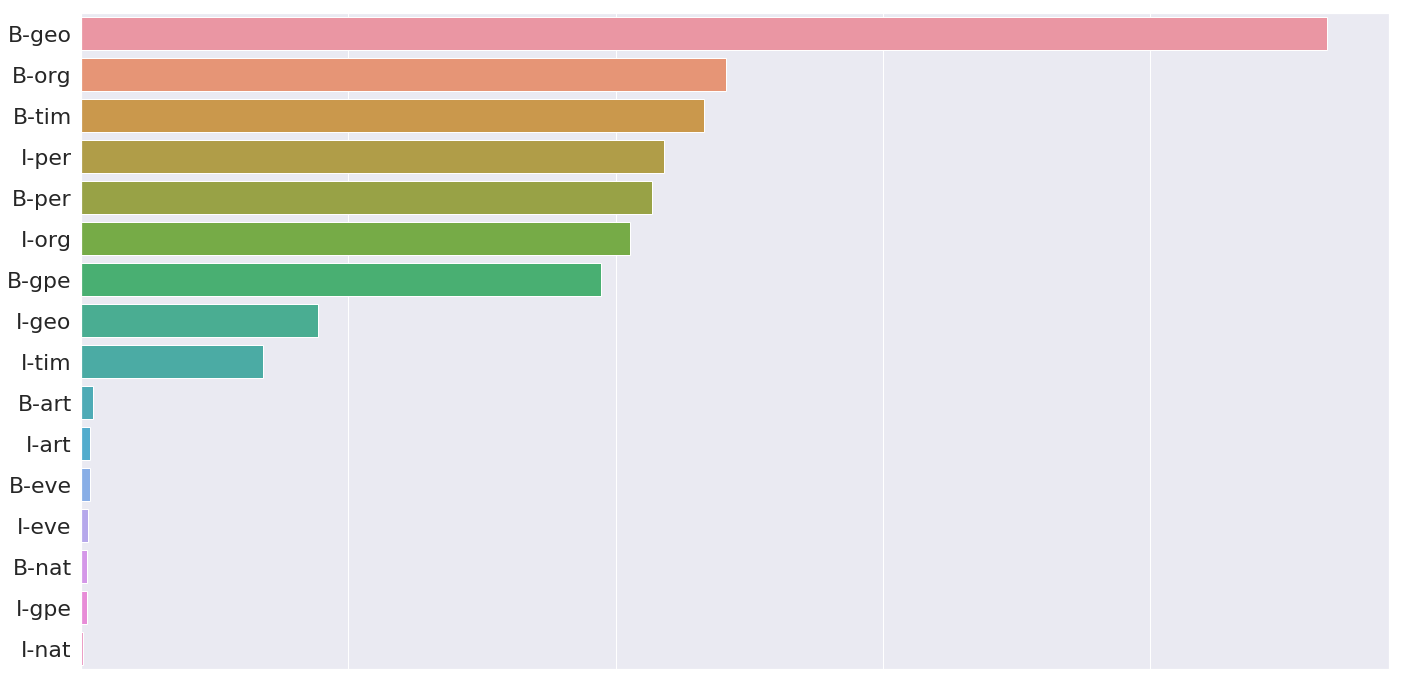

In [117]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 10))
sns.barplot(
    x=tagged_texts_as_pd[tagged_texts_as_pd.ner_tag != 'O'].ner_tag.value_counts().values,
    y=tagged_texts_as_pd[tagged_texts_as_pd.ner_tag != 'O'].ner_tag.value_counts().index,
    orient='h'
)
plt.tight_layout()
plt.show()

That looks pretty much better.

now let's look at tags with low number of words:

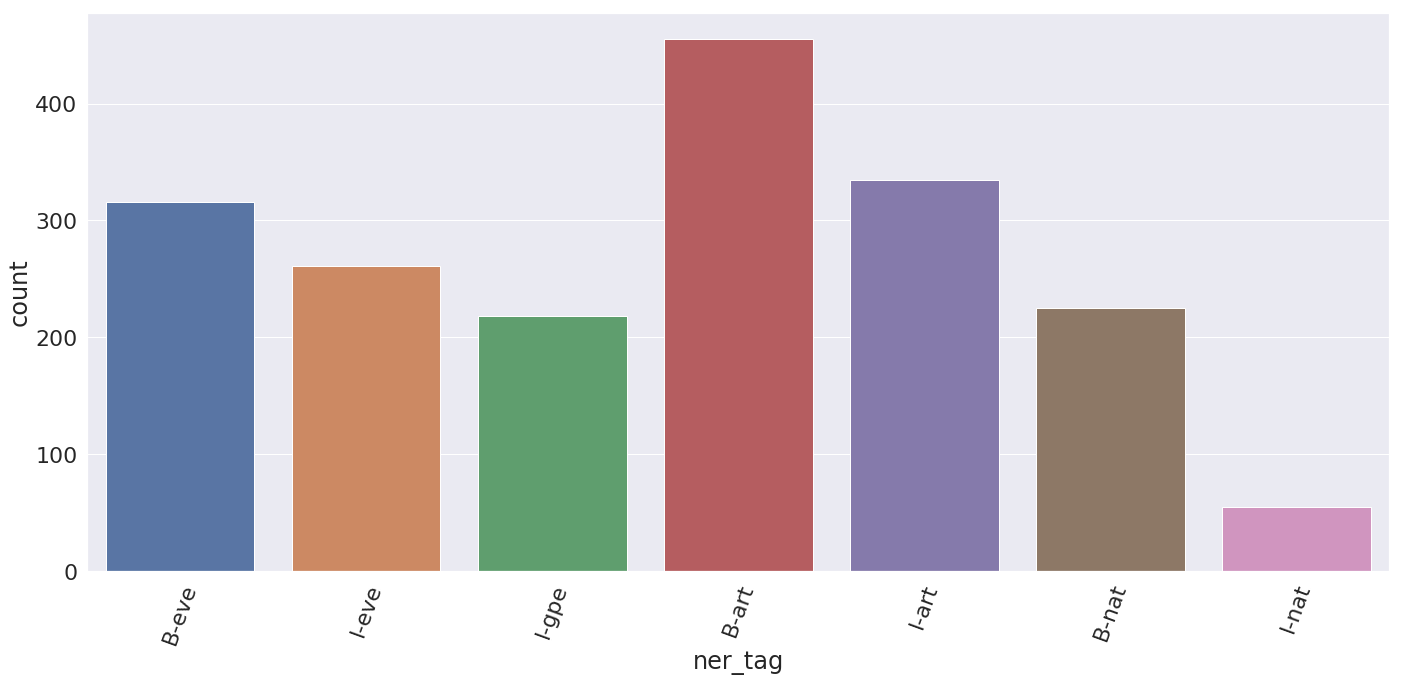

In [33]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 10))
ax = sns.countplot('ner_tag', data=tagged_texts_as_pd[tagged_texts_as_pd.ner_tag.isin(['B-art', 'I-art', 'I-gpe', 'B-nat', 'B-eve', 'I-eve', 'I-nat'])])
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="center")
plt.tight_layout()
plt.show()

As it can be seen there is not so much words with these tags.

Also we can notice that the number or GPE-entities composed from several words is very small.

# Tags count per each word

Here the idea is to look at how many tags can be assigned to some particular word.

In [34]:
tags_count_per_word_distribution = tagged_texts_as_pd.groupby('lemma')['ner_tag'].agg(lambda x: list(set(x))).reset_index().rename({'ner_tag': 'tags_list'}, axis=1)

In [35]:
tags_count_per_word_distribution['tags_count'] = tags_count_per_word_distribution.tags_list.apply(len)

In [36]:
tags_count_per_word_distribution.sort_values(by='tags_count', ascending=False).head(20)

,lemma,tags_list,tags_count
17879,of,"[B-tim, I-tim, I-gpe, I-org, I-geo, B-org, I-p...",11
10322,france,"[B-eve, B-gpe, I-org, I-geo, B-org, B-art, B-p...",11
18448,pakistan,"[B-eve, B-gpe, I-tim, I-gpe, I-org, I-geo, B-o...",11
24471,the,"[B-tim, B-eve, I-tim, I-org, I-geo, B-org, B-a...",11
23412,state,"[I-tim, I-gpe, I-org, I-geo, B-org, B-art, I-p...",10
17356,new,"[B-tim, B-eve, B-gpe, I-tim, I-org, I-geo, B-o...",10
17984,olympics,"[B-tim, B-eve, I-tim, I-org, I-geo, B-org, I-p...",10
14,-,"[B-tim, I-tim, I-org, I-geo, B-org, I-art, I-p...",10
9044,england,"[B-tim, B-gpe, I-tim, I-org, I-geo, B-org, I-p...",10
15319,madrid,"[B-tim, B-eve, I-tim, I-org, I-geo, B-org, I-p...",9


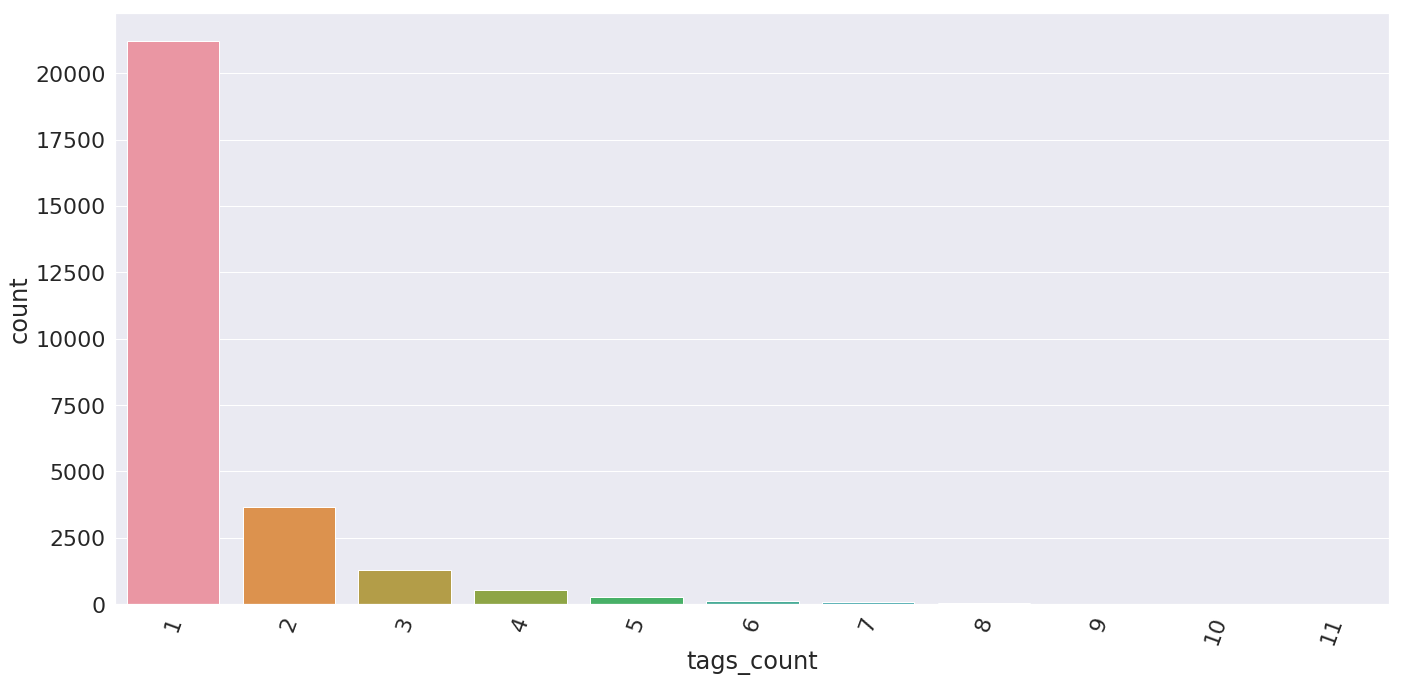

In [37]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 10))
ax = sns.countplot('tags_count', data=tags_count_per_word_distribution)
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="center")
plt.tight_layout()
plt.show()

As we can see the majority of words has only one tag.

But there are also others, let's look at them a bit closer:

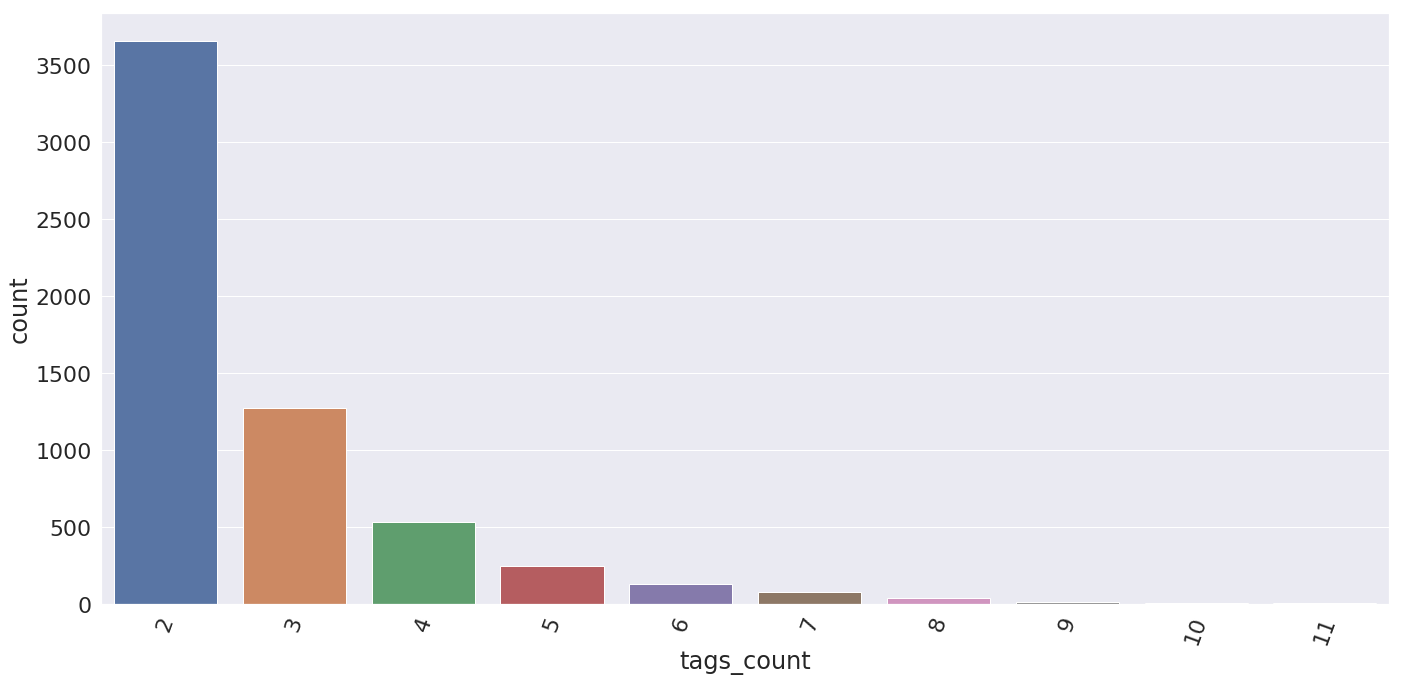

In [38]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 10))
ax = sns.countplot('tags_count', data=tags_count_per_word_distribution[tags_count_per_word_distribution.tags_count != 1])
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="center")
plt.tight_layout()
plt.show()

So I guess depending on the context some particular word can be either 'O' or some tag.

Also there are lots of stop-words which can be a part on some NER-tag composed from several words ("Republic of Korea", "The lonely mountain" etc.)

Let's trey to take a look at those lemmas that are not in nltk stop-words list:

In [42]:
stopWords = set(stopwords.words('english'))

In [43]:
tags_count_per_word_distribution = tagged_texts_as_pd[
    (~tagged_texts_as_pd.lemma.isin(stopWords))
].groupby('lemma')['ner_tag'].agg(lambda x: list(set(x))).reset_index().rename({'ner_tag': 'tags_list'}, axis=1)

In [44]:
tags_count_per_word_distribution['tags_count'] = tags_count_per_word_distribution.tags_list.apply(len)

In [45]:
tags_count_per_word_distribution.sort_values(by='tags_count', ascending=False).head(20)

,lemma,tags_list,tags_count
18372,pakistan,"[B-eve, B-gpe, I-tim, I-gpe, I-org, I-geo, B-o...",11
10290,france,"[B-eve, B-gpe, I-org, I-geo, B-org, B-art, B-p...",11
14,-,"[B-tim, I-tim, I-org, I-geo, B-org, I-art, I-p...",10
23329,state,"[I-tim, I-gpe, I-org, I-geo, B-org, B-art, I-p...",10
9014,england,"[B-tim, B-gpe, I-tim, I-org, I-geo, B-org, I-p...",10
17918,olympics,"[B-tim, B-eve, I-tim, I-org, I-geo, B-org, I-p...",10
17296,new,"[B-tim, B-eve, B-gpe, I-tim, I-org, I-geo, B-o...",10
6150,christmas,"[B-tim, B-eve, I-tim, I-org, I-geo, B-org, B-g...",9
16847,muslim,"[B-tim, I-tim, I-org, I-geo, B-org, I-per, B-g...",9
12935,international,"[B-eve, I-org, I-geo, B-org, B-art, B-geo, I-a...",9


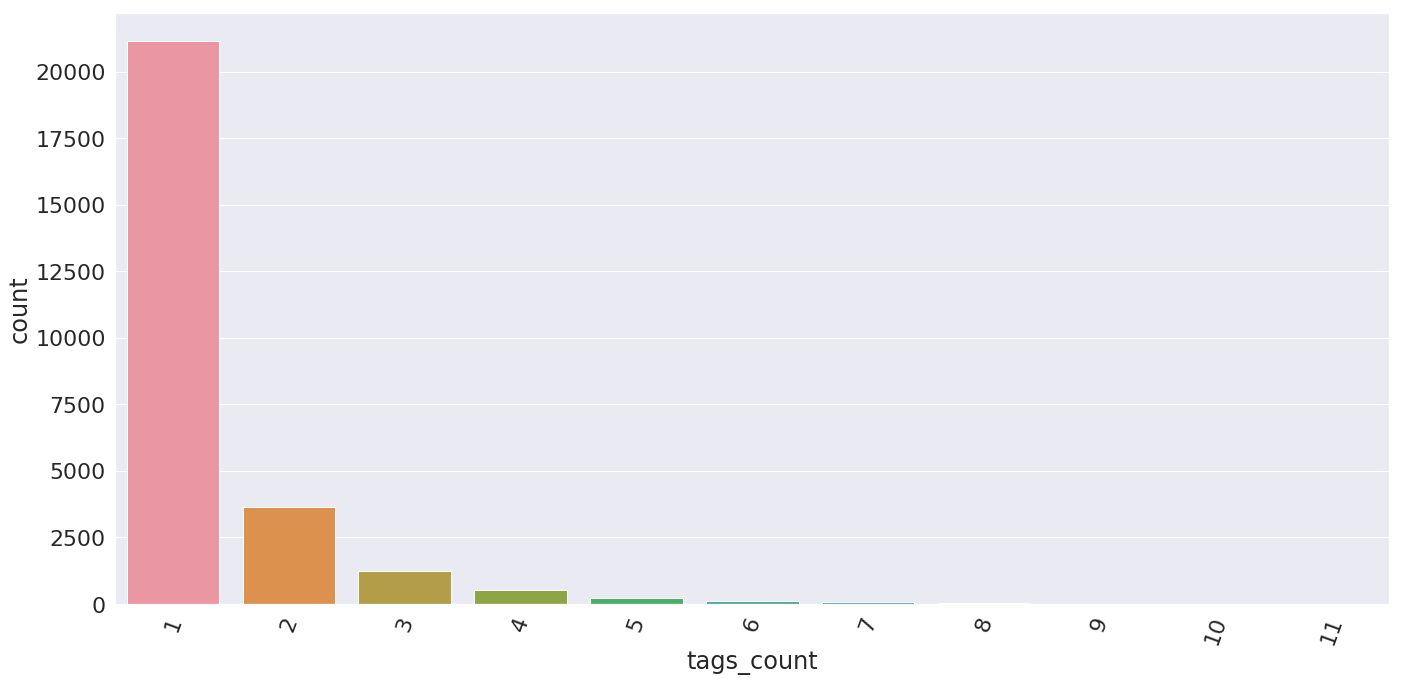

In [46]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 10))
ax = sns.countplot('tags_count', data=tags_count_per_word_distribution)
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="center")
plt.tight_layout()
plt.show()

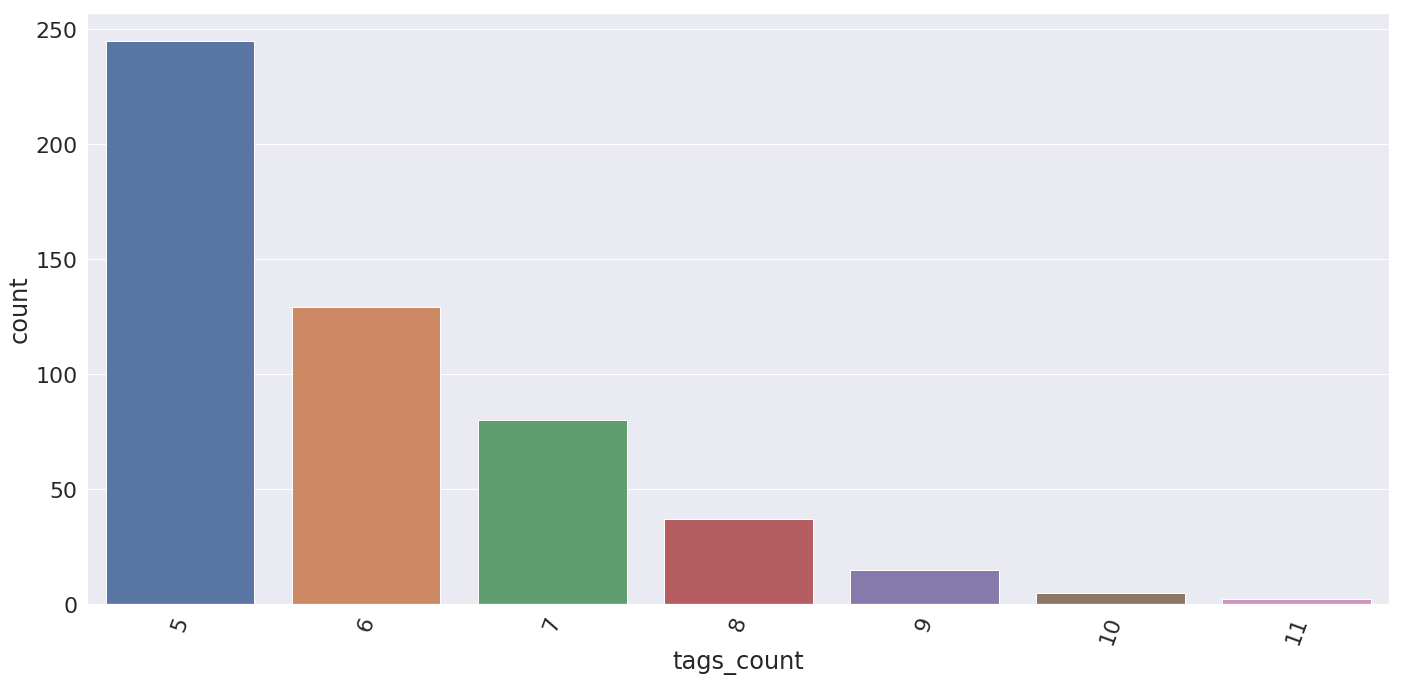

In [47]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 10))
ax = sns.countplot('tags_count', data=tags_count_per_word_distribution[tags_count_per_word_distribution.tags_count >= 5])
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="center")
plt.tight_layout()
plt.show()

# Lemma length distribution

Let's lookt at how word lengths are distributed:

In [48]:
tagged_texts_as_pd['lemma_length'] = tagged_texts_as_pd.lemma.apply(len)

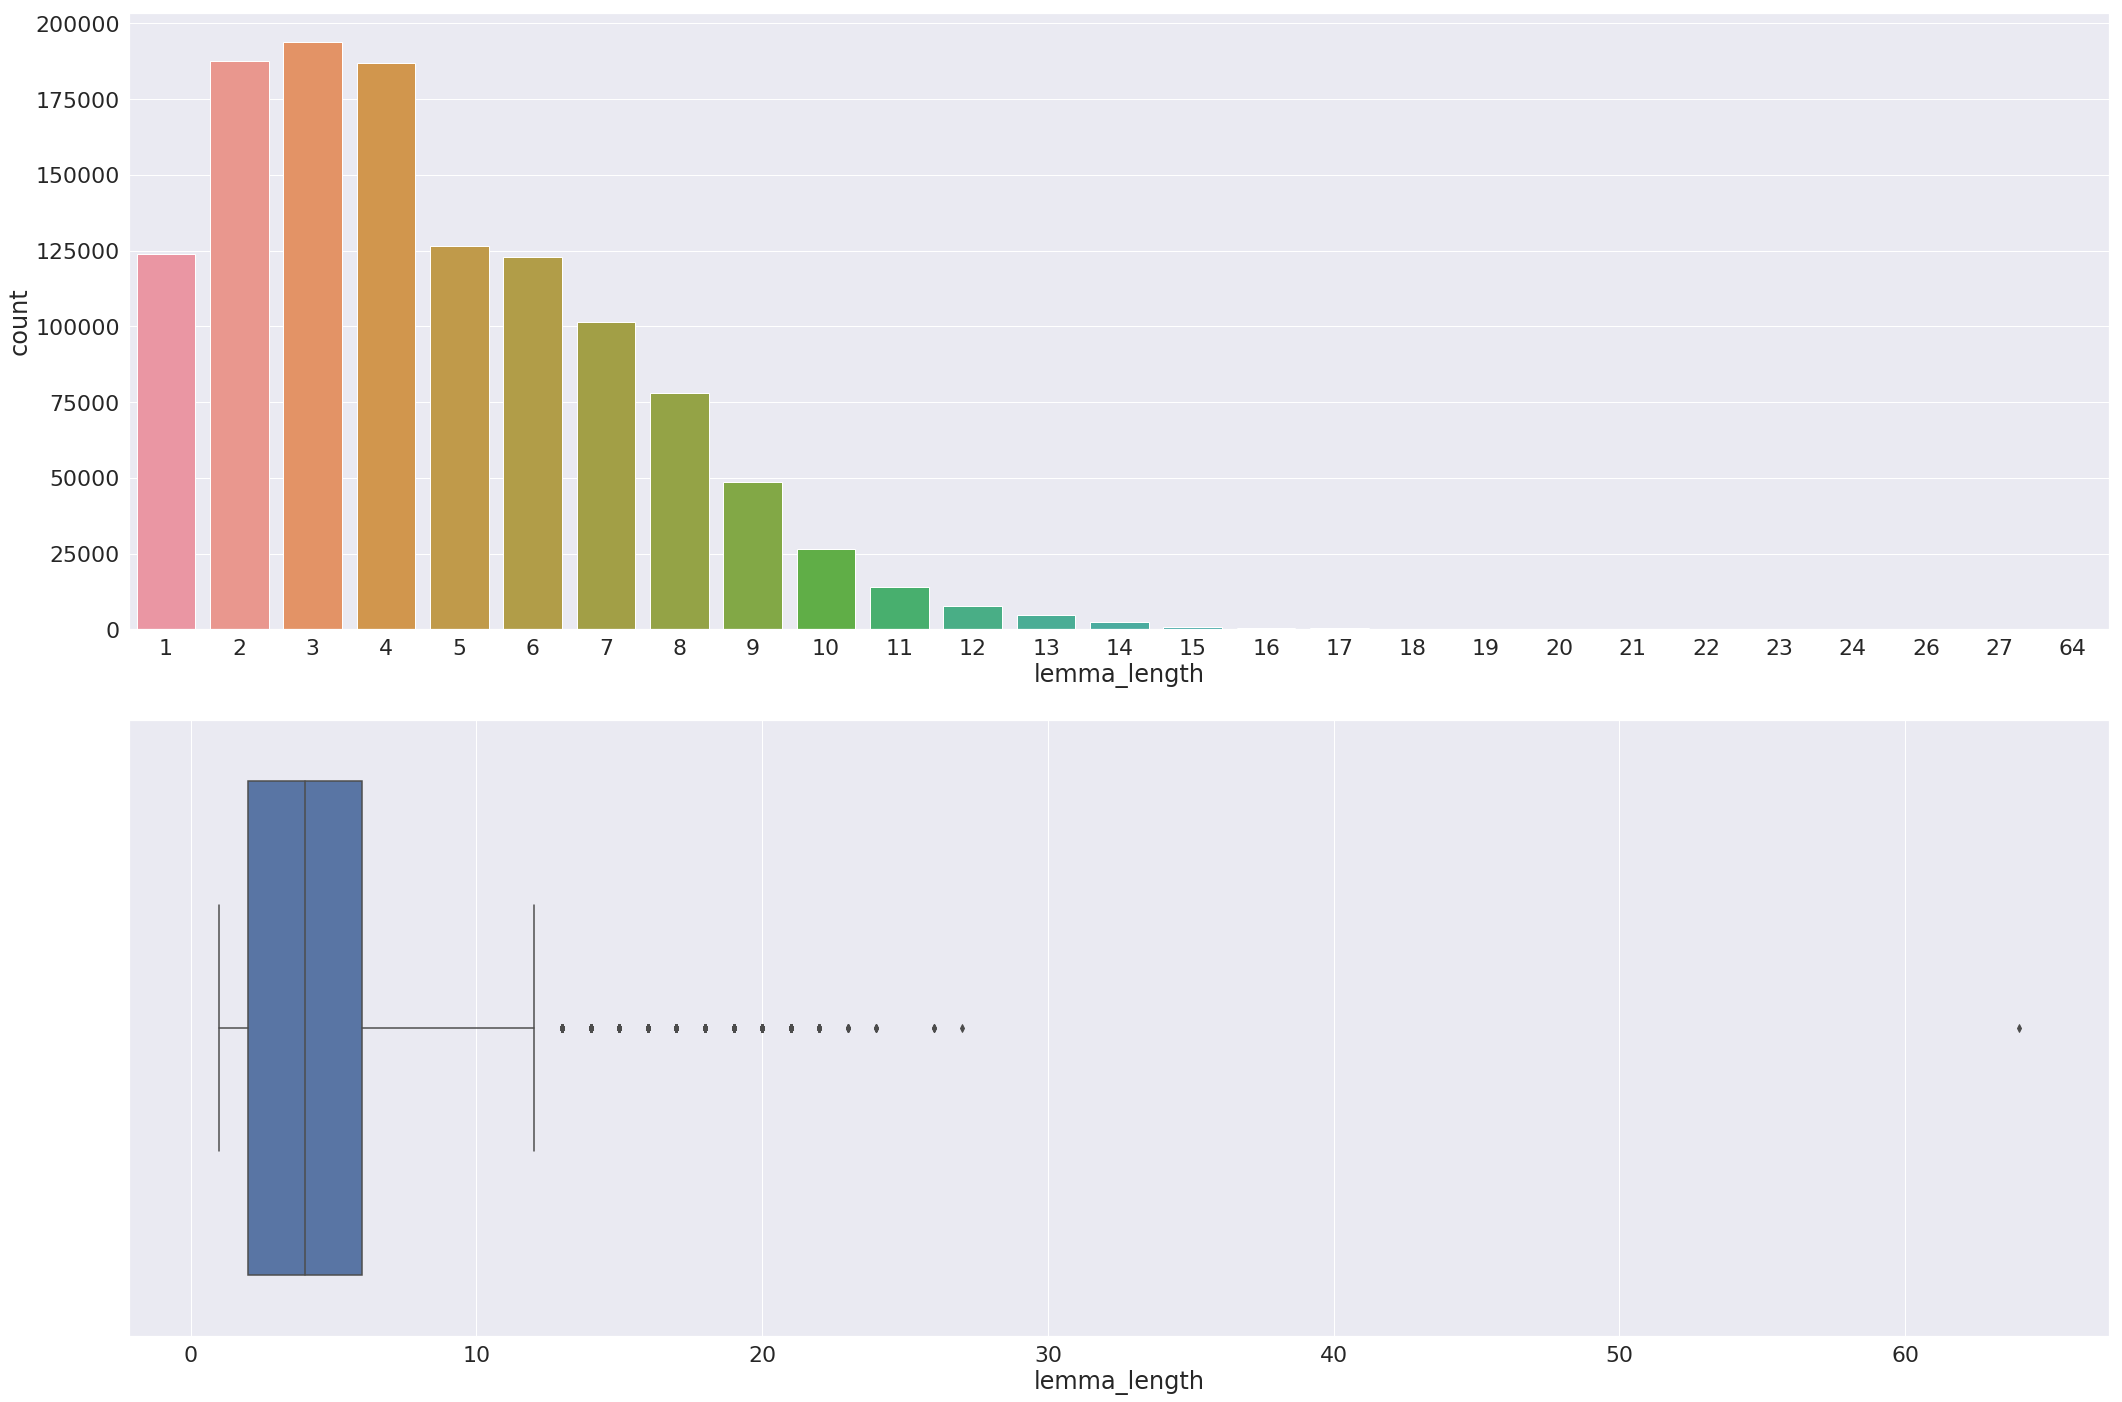

In [49]:
sns.set(font_scale=2)
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(30, 20))
sns.countplot('lemma_length', data=tagged_texts_as_pd, ax=ax1)
sns.boxplot('lemma_length', data=tagged_texts_as_pd, ax=ax2, orient='h')
plt.tight_layout()
plt.show()

The main majority of words has length between 3 and 7 letters and there are obviously several outliers.

Let's look at them closer:

In [50]:
tagged_texts_as_pd.sort_values(by='lemma_length', ascending=False).head(30)

,token,pos_tag,lemma,ner_tag,lemma_length
435740,https://www.celebritiesforcharity.org/raffles/...,NNP,https://www.celebritiesforcharity.org/raffles/...,B-geo,64
453442,cricketer-turned-politician,JJ,cricketer-turned-politician,O,27
523771,internationally-recognized,JJ,internationally-recognized,O,26
146076,internationally-recognized,JJ,internationally-recognized,O,26
959099,internationally-recognized,JJ,internationally-recognized,O,26
729728,environmentally-friendly,JJ,environmentally-friendly,O,24
1116630,Petropavlosk-Kamchatskii,NNP,petropavlosk-kamchatskii,B-geo,24
1033113,environmentally-friendly,RB,environmentally-friendly,O,24
1205564,internationally-brokered,JJ,internationally-brokered,O,24
648644,developmentaly-oriented,JJ,developmentaly-oriented,O,23


Ok, and how do short words look like?

In [51]:
tagged_texts_as_pd.sort_values(by='lemma_length', ascending=True).head(60)

,token,pos_tag,lemma,ner_tag,lemma_length
1231278,.,.,.,O,1
949840,a,DT,a,O,1
269971,",",",",",",O,1
269975,",",",",",",O,1
269983,.,.,.,O,1
949822,.,.,.,O,1
949815,a,DT,a,O,1
269997,a,DT,a,O,1
949812,a,DT,a,O,1
949803,.,.,.,O,1


Well there are obviously lots of stop-words which will bring some noise in the data.



# Stop-words and punctuation

In [52]:
stopWords = set(stopwords.words('english'))

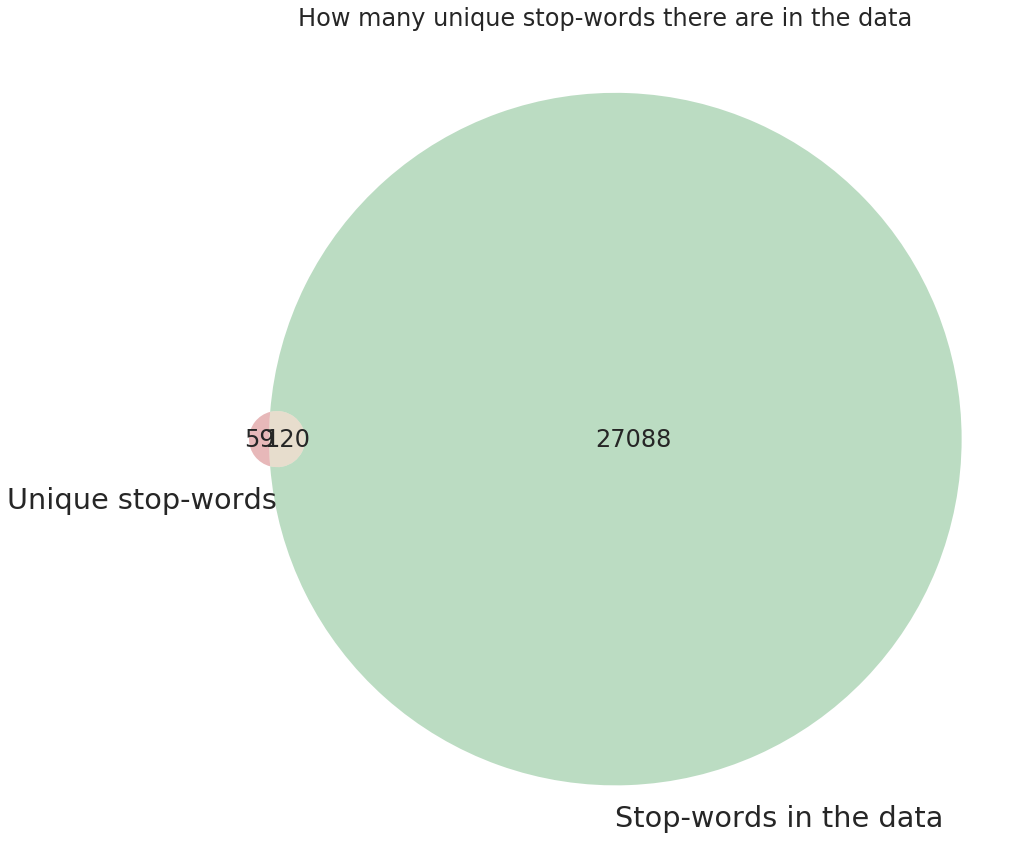

In [53]:
plt.figure(figsize=(15, 15))
venn2(subsets=[stopWords, set(tagged_texts_as_pd.lemma)], set_labels=('Unique stop-words', 'Stop-words in the data'))
plt.title('How many unique stop-words there are in the data')
plt.show()

Let's remove them and see if the NER-tag distribution will change:

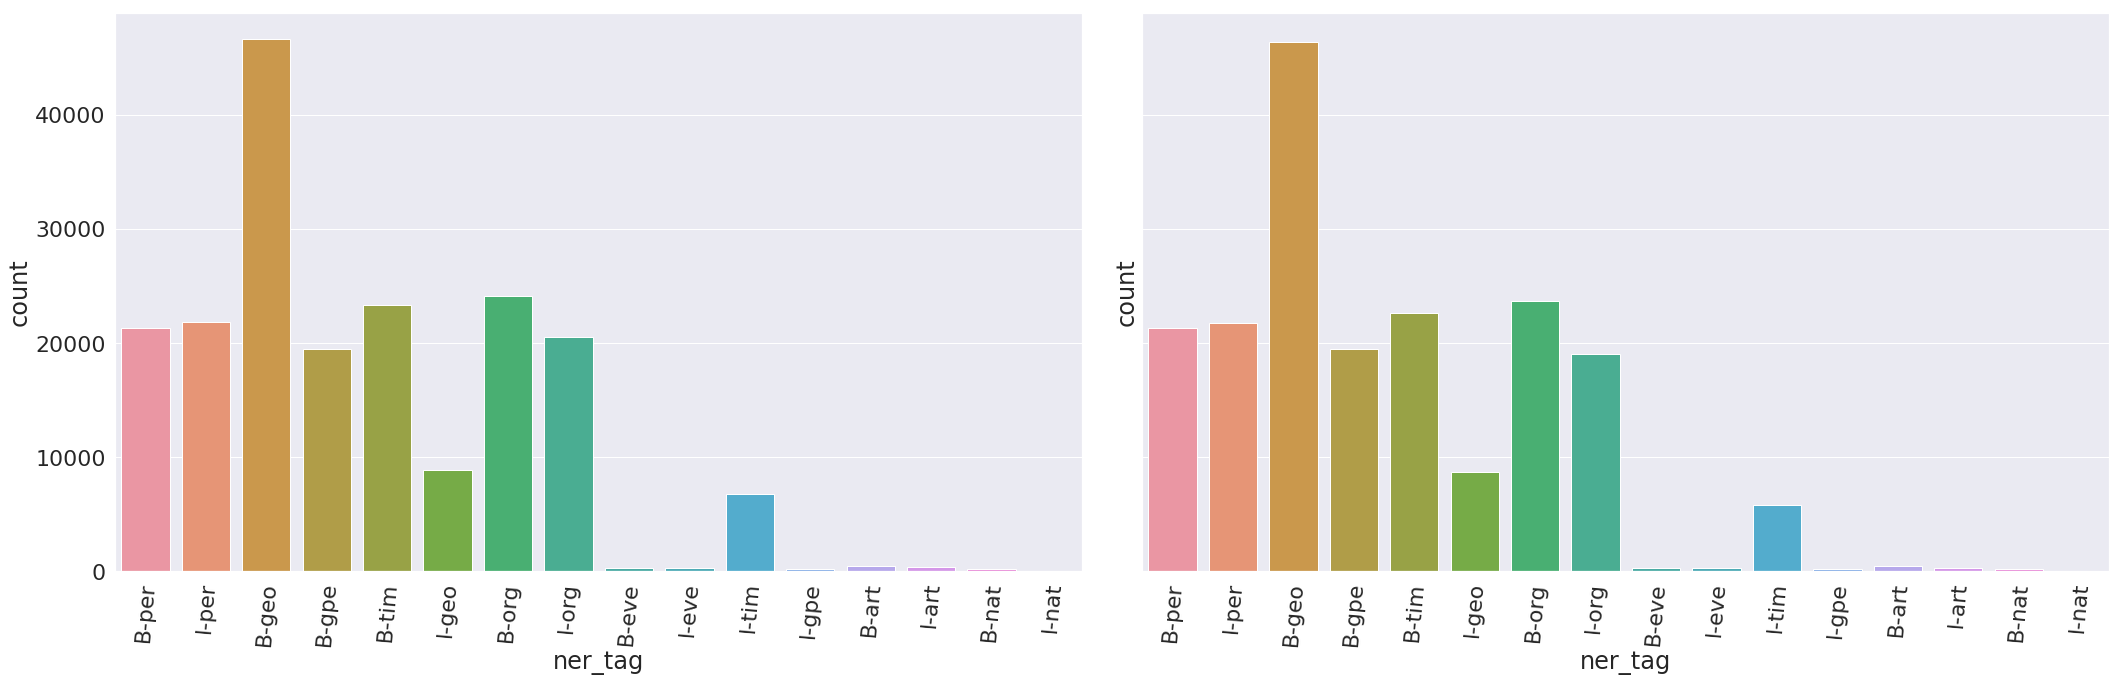

In [54]:
sns.set(font_scale=2)
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(30, 10), sharey=True)
sns.countplot('ner_tag', data=tagged_texts_as_pd[tagged_texts_as_pd.ner_tag != 'O'], ax=ax1)
sns.countplot('ner_tag', data=tagged_texts_as_pd[(~tagged_texts_as_pd.lemma.isin(stopWords)) & (tagged_texts_as_pd.ner_tag != 'O')], ax=ax2)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=85, ha="center")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=85, ha="center")
plt.tight_layout()
plt.show()

We can see from these plots that the distribution has not dramatically changed.

How many words were deleted?

In [55]:
len(tagged_texts_as_pd) - len(tagged_texts_as_pd[(~tagged_texts_as_pd.lemma.isin(stopWords))])

406955

Wow!

So many words were deleted and yet the distribution of NER-tags stayed almost the same.

Looks like it was mostly "O"-tags (surprise-surprise, who would have thought!)))

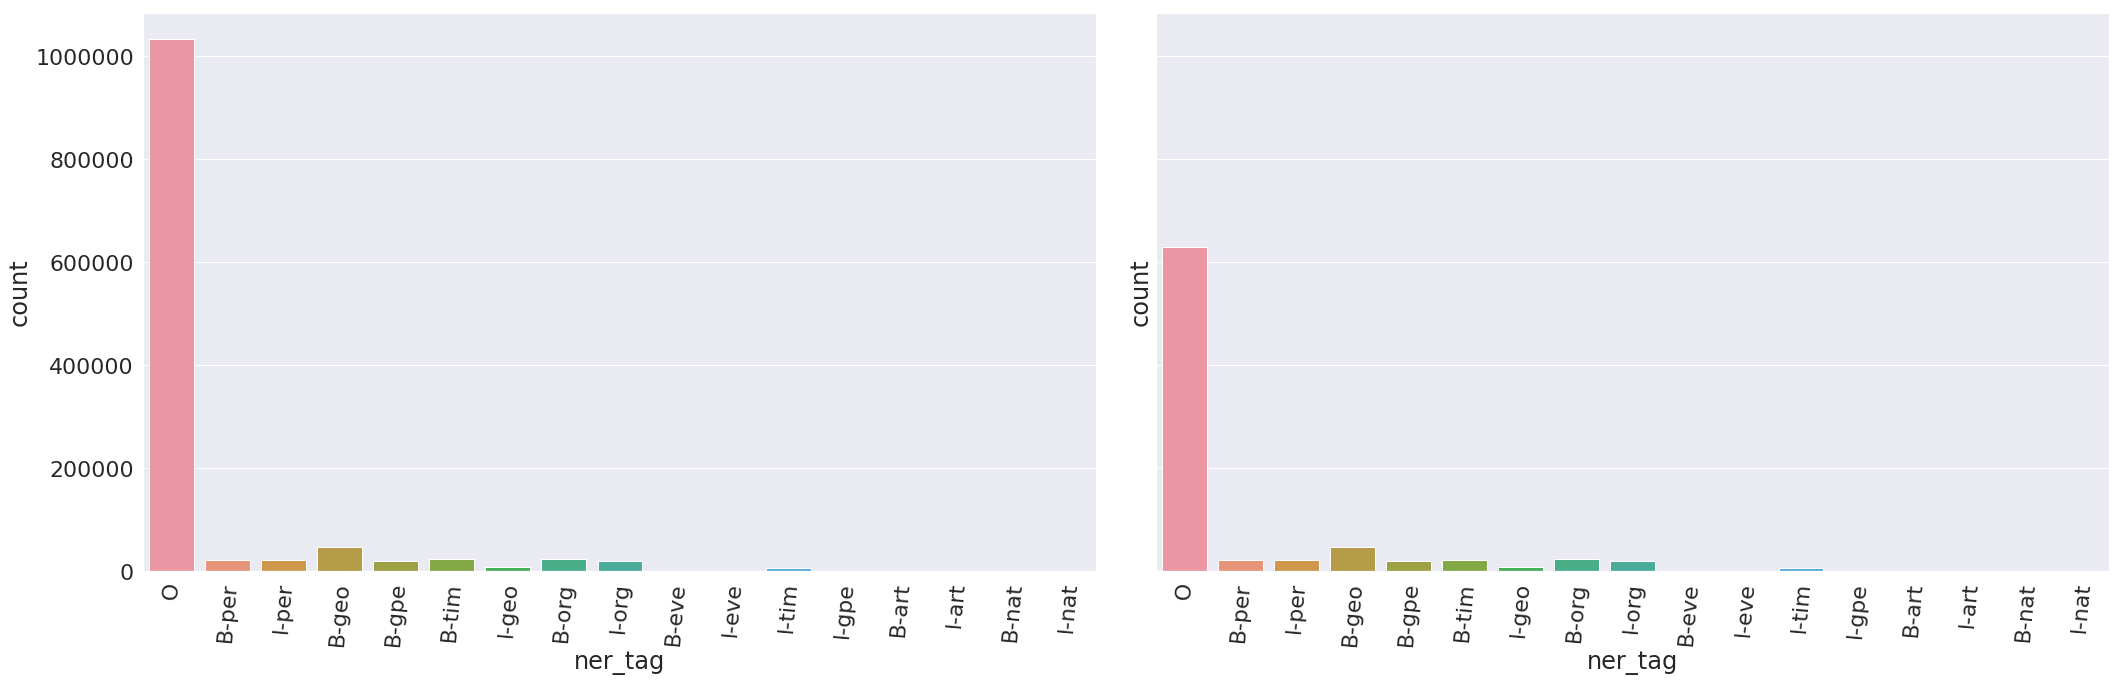

In [56]:
sns.set(font_scale=2)
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(30, 10), sharey=True)
sns.countplot('ner_tag', data=tagged_texts_as_pd, ax=ax1)
sns.countplot('ner_tag', data=tagged_texts_as_pd[~tagged_texts_as_pd.lemma.isin(stopWords)], ax=ax2)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=85, ha="center")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=85, ha="center")
plt.tight_layout()
plt.show()

And yep, it was mostly "O"-tags which can be seen from the difference in the two first columns of the plots.

# Token shape

Let's introduce new feature - word shape.

Here is the method to calculate it:

In [57]:
def wordshape(word):
    import re
    t1 = re.sub('[A-Z]', 'X', word)
    t2 = re.sub('[a-z]', 'x', t1)
    t3 = re.sub('[0-9]', 'd', t2)
    return t3

In [58]:
tagged_texts_as_pd['word_shape'] = tagged_texts_as_pd.token.apply(wordshape)

In [59]:
tagged_texts_as_pd.head(20)

,token,pos_tag,lemma,ner_tag,lemma_length,word_shape
0,Former,JJ,former,O,6,Xxxxxx
1,Ecuadorean,NNP,ecuadorean,O,10,Xxxxxxxxxx
2,President,NNP,president,B-per,9,Xxxxxxxxx
3,Lucio,NNP,lucio,I-per,5,Xxxxx
4,Gutierrez,NNP,gutierrez,I-per,9,Xxxxxxxxx
5,has,VBZ,have,O,4,xxx
6,formally,RB,formally,O,8,xxxxxxxx
7,requested,VBN,request,O,7,xxxxxxxxx
8,political,JJ,political,O,9,xxxxxxxxx
9,asylum,NN,asylum,O,6,xxxxxx


In [60]:
tagged_texts_as_pd.word_shape.value_counts()

xxx                     164427
xx                      139378
xxxx                    131151
xxxxx                    85444
xxxxxx                   81815
xxxxxxx                  78572
xxxxxxxx                 60657
.                        56739
xxxxxxxxx                48462
Xxxxxx                   37369
,                        35772
Xxxxx                    33223
Xxxxxxx                  32046
xxxxxxxxxx               26276
x                        23793
Xxxxxxxx                 22289
Xxxx                     21397
Xxx                      20758
Xxxxxxxxx                16982
'x                       13351
xxxxxxxxxxx              11742
Xx                        7063
xxxxxxxxxxxx              6740
Xxxxxxxxxx                6656
X.X.                      6587
dd                        6524
Xxxxxxxxxxx               5200
Xx.                       4311
xxxxxxxxxxxxx             3785
dddd                      3129
                         ...  
Xxxx-xxxxxxxxxxxx            1
xxxxx-xx

# Is the token titled or not?

In [61]:
tagged_texts_as_pd['is_title'] = tagged_texts_as_pd.token.apply(lambda x: int(str(x).istitle()))

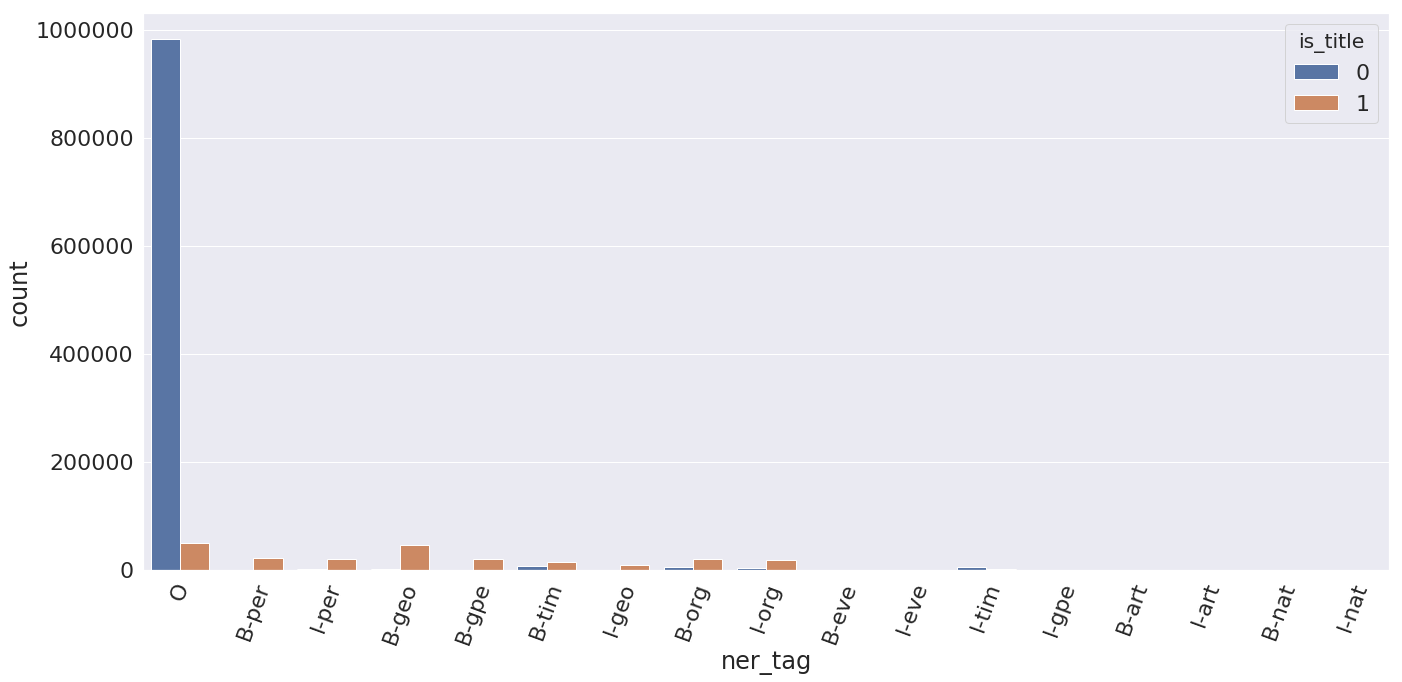

In [62]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 10))
ax = sns.countplot('ner_tag', data=tagged_texts_as_pd, hue='is_title')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="center")
plt.tight_layout()
plt.show()

Ok, get it most (or even almost all) tokens which are not titled have 'O'-tag.

What about the rest?

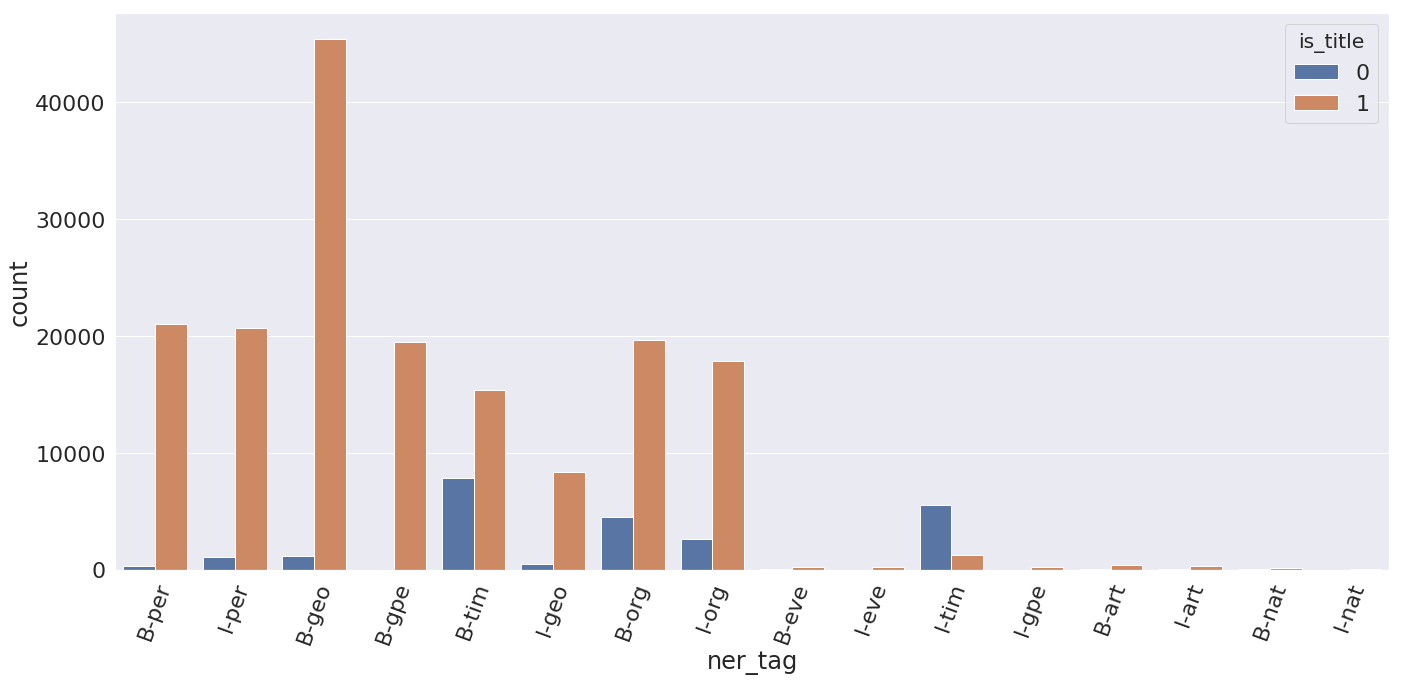

In [63]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 10))
ax = sns.countplot('ner_tag', data=tagged_texts_as_pd[tagged_texts_as_pd.ner_tag != 'O'], hue='is_title')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="center")
plt.tight_layout()
plt.show()

This plot shows more clear that there is only 'I-tim' tag which have more untitled words than titled ones.

Let's also look at very rare tags:

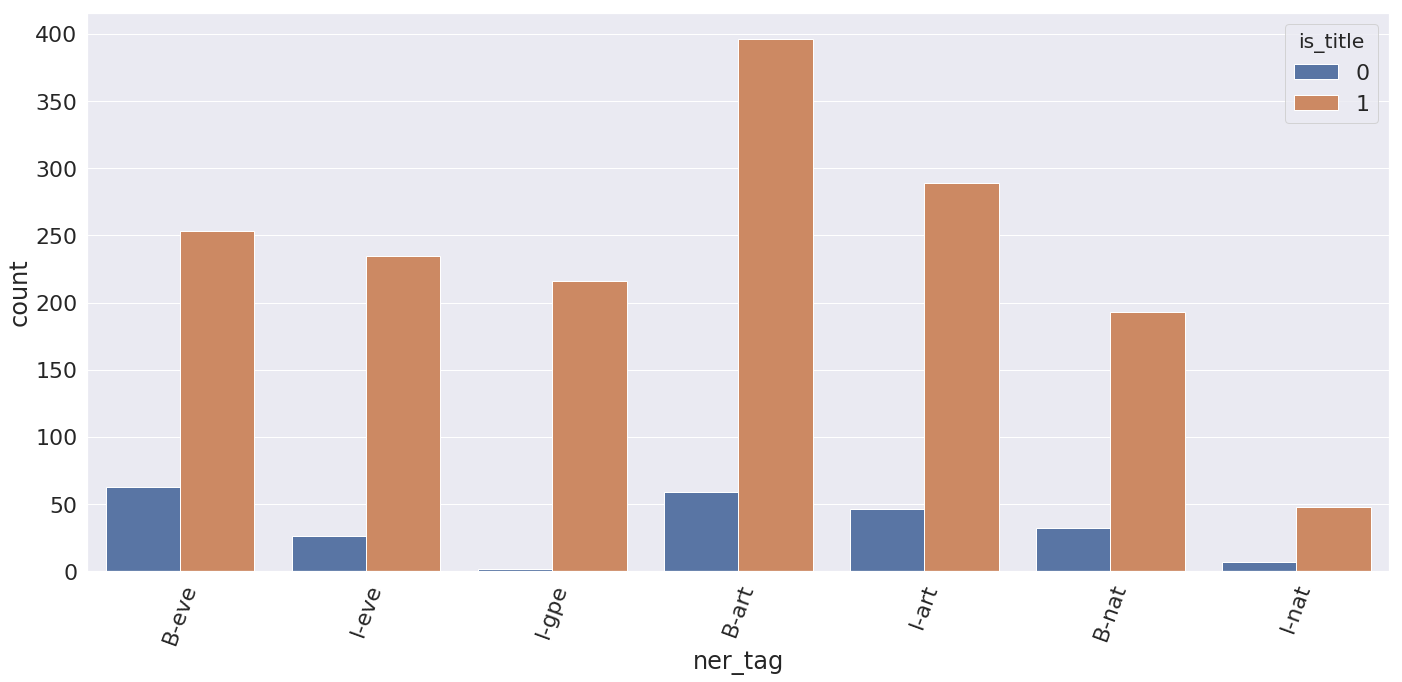

In [64]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 10))
ax = sns.countplot('ner_tag', data=tagged_texts_as_pd[tagged_texts_as_pd.ner_tag.isin(['B-eve', 'I-eve', 'I-gpe', 'B-art', 'I-art', 'B-nat', 'I-nat'])], hue='is_title')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="center")
plt.tight_layout()
plt.show()

And yep, still the same.

Majority of words with NER-tags are titled.

Let's also try to look at them without stop-words:

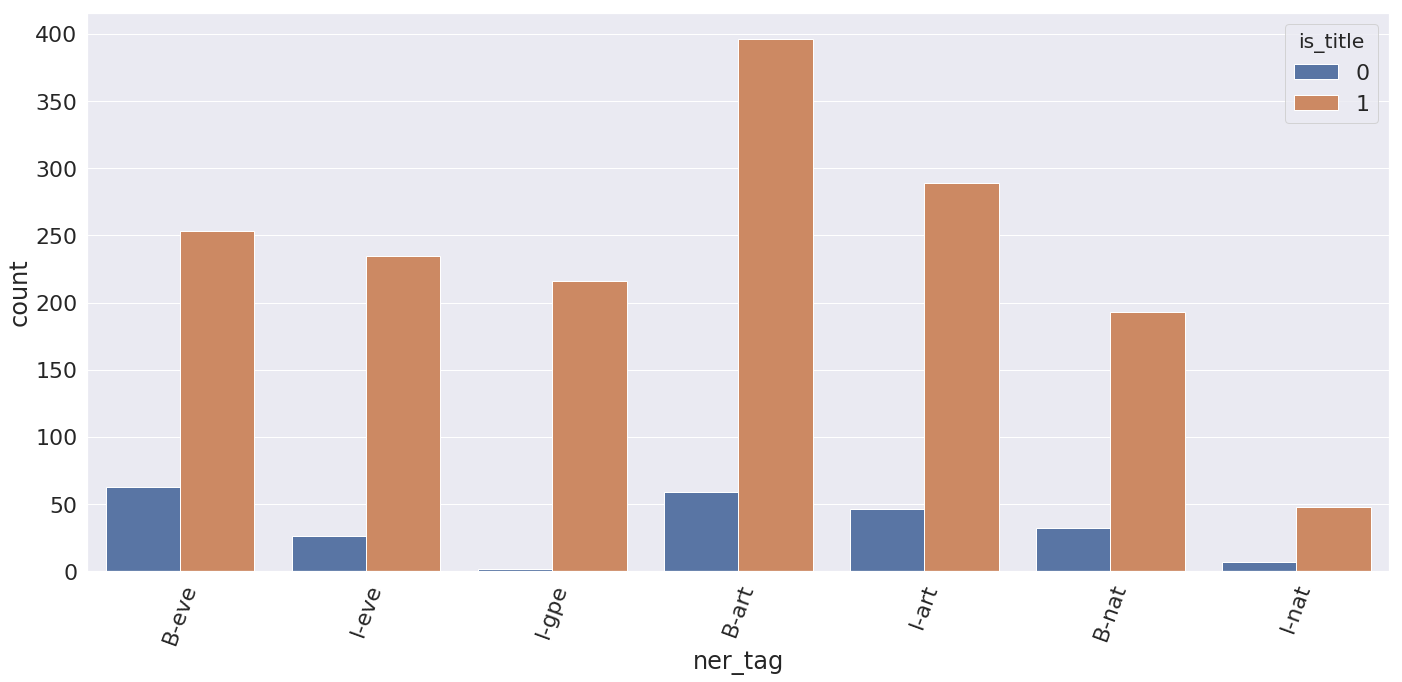

In [67]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 10))
ax = sns.countplot(
    'ner_tag',
    data=tagged_texts_as_pd[
        (tagged_texts_as_pd.ner_tag.isin(['B-eve', 'I-eve', 'I-gpe', 'B-art', 'I-art', 'B-nat', 'I-nat'])) & (~tagged_texts_as_pd.ner_tag.isin(stopWords))
    ],
    hue='is_title'
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="center")
plt.tight_layout()
plt.show()

Not so much of a change.

# Is the token purely alphabetic or not?

In [94]:
tagged_texts_as_pd['purely_alphabetic'] = tagged_texts_as_pd.token.apply(lambda x: int(str(x).isalpha()))

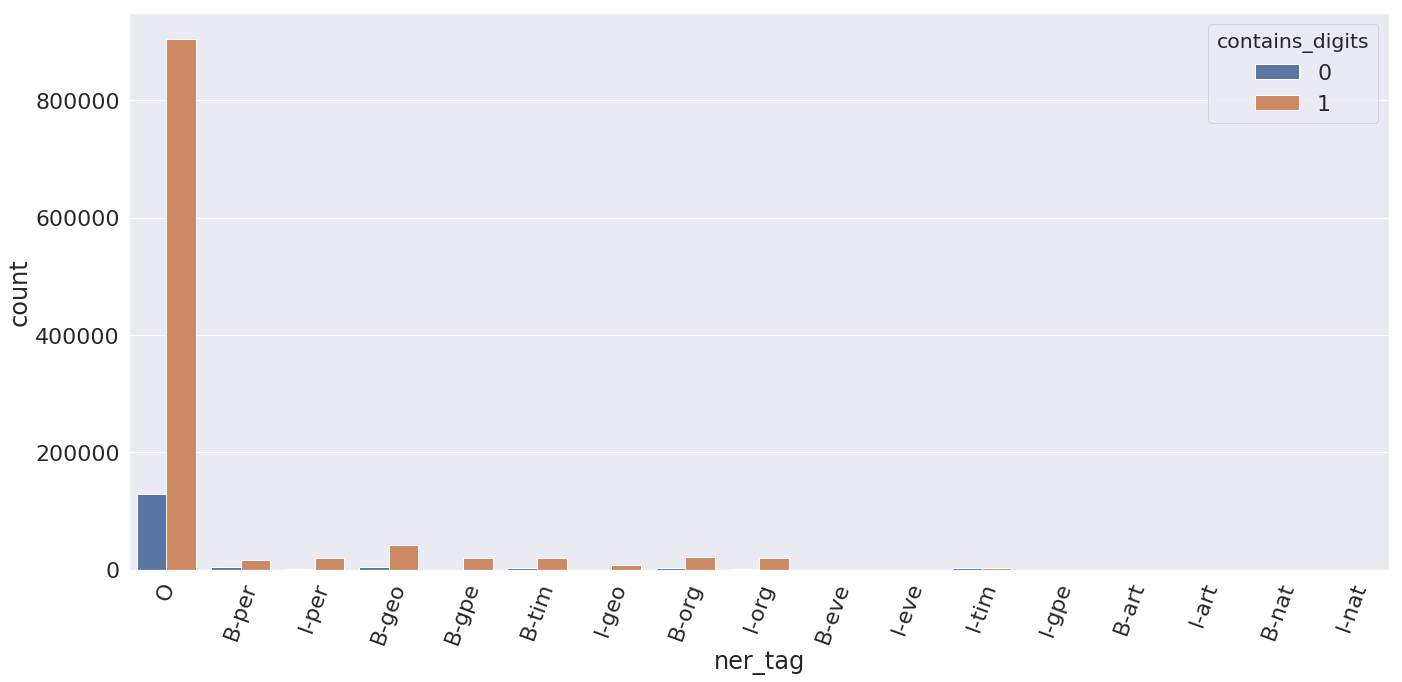

In [74]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 10))
ax = sns.countplot('ner_tag', data=tagged_texts_as_pd, hue='purely_alphabetic')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="center")
plt.tight_layout()
plt.show()

Interesting.

Almost all tokens are purely alphabetic.

Let's look a bit closer:

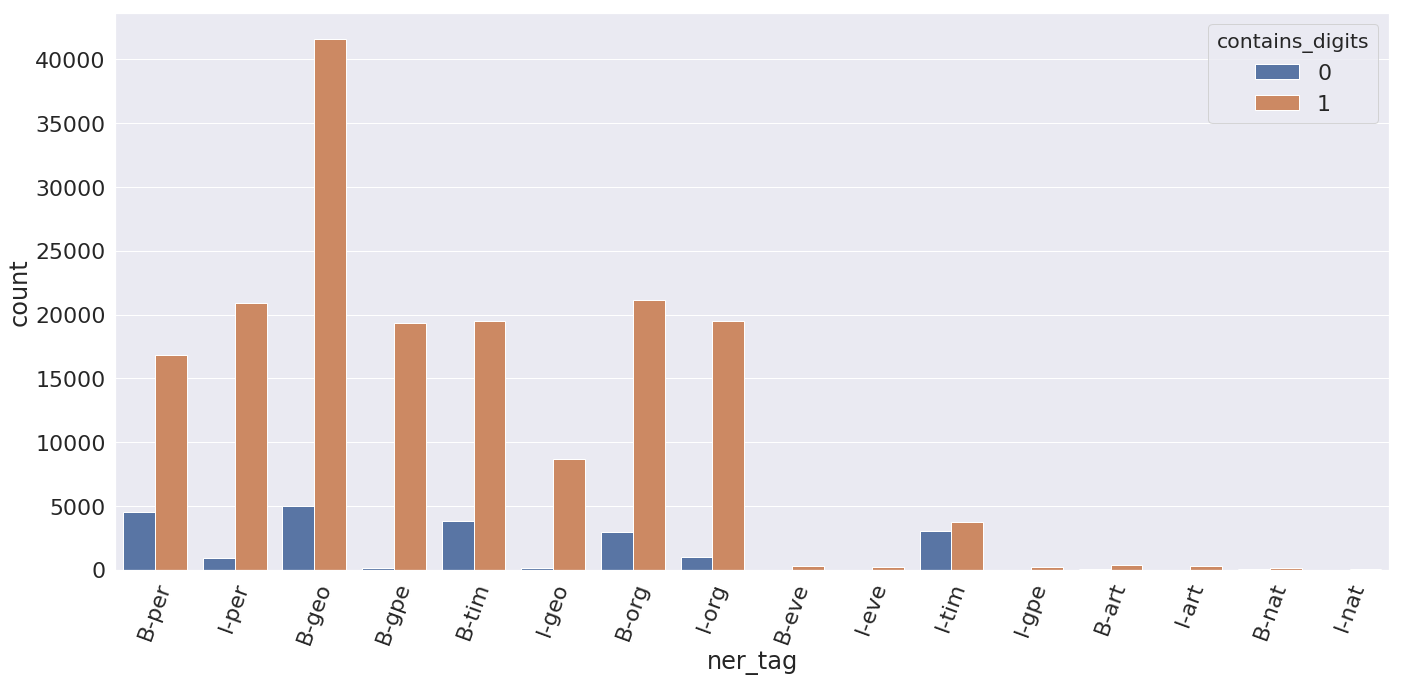

In [75]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 10))
ax = sns.countplot('ner_tag', data=tagged_texts_as_pd[tagged_texts_as_pd.ner_tag != 'O'], hue='purely_alphabetic')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="center")
plt.tight_layout()
plt.show()

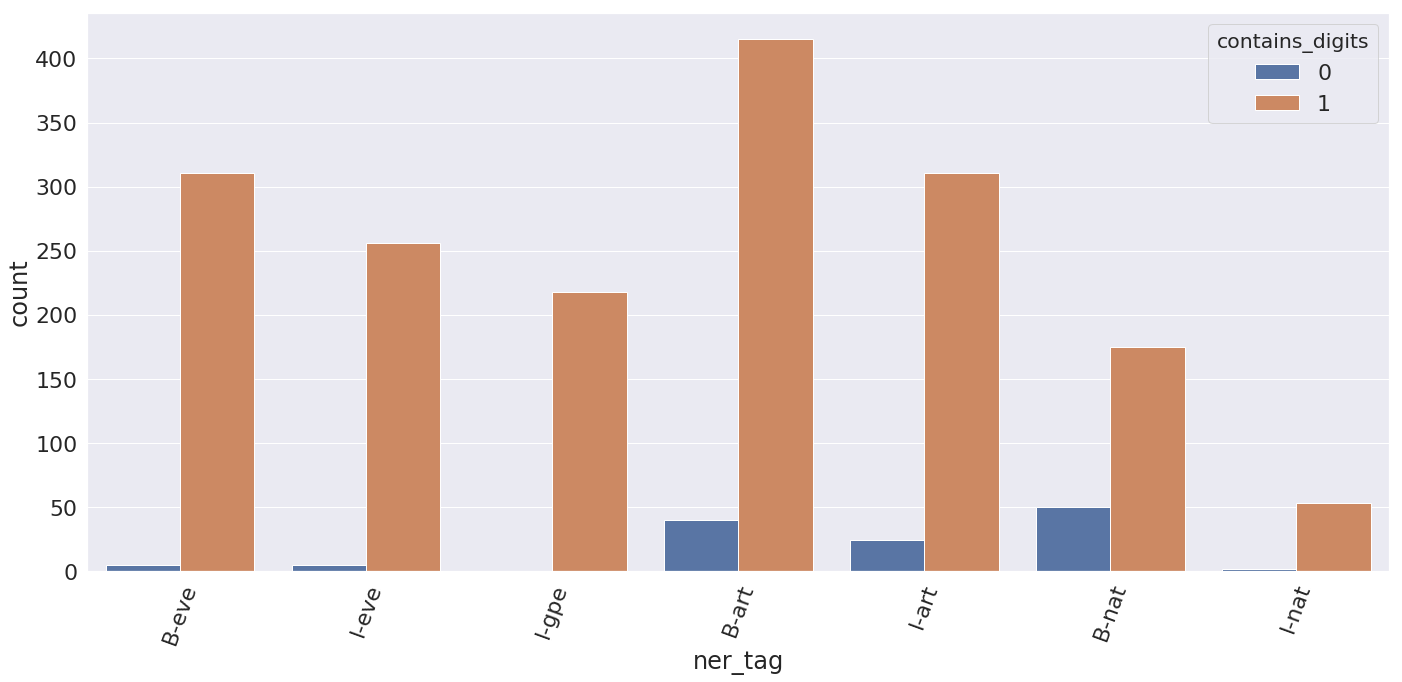

In [76]:
sns.set(font_scale=2)
plt.figure(figsize=(20, 10))
ax = sns.countplot(
    'ner_tag',
    data=tagged_texts_as_pd[
        (tagged_texts_as_pd.ner_tag.isin(['B-eve', 'I-eve', 'I-gpe', 'B-art', 'I-art', 'B-nat', 'I-nat'])) & (~tagged_texts_as_pd.ner_tag.isin(stopWords))
    ],
    hue='purely_alphabetic'
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="center")
plt.tight_layout()
plt.show()

Nothing has changed.

# Calculate some statistics

In [83]:
ner_pos_contingency_table = pd.pivot_table(
    data=tagged_texts_as_pd[tagged_texts_as_pd.ner_tag != 'O'],
    fill_value=0,
    values='token',
    index='pos_tag',
    columns='ner_tag',
    aggfunc=len
)

In [84]:
ner_pos_contingency_table

ner_tag,B-art,B-eve,B-geo,B-gpe,B-nat,B-org,B-per,B-tim,I-art,I-eve,I-geo,I-gpe,I-nat,I-org,I-per,I-tim
pos_tag,,,,,,,,,,,,,,,,
",",0,0,0,0,0,8,0,7,0,0,0,0,0,119,0,194
:,0,0,1,0,0,1,2,4,1,0,30,0,0,29,27,30
;,0,0,0,0,0,0,0,0,0,0,9,0,0,1,0,0
CC,0,0,0,0,0,30,0,15,1,0,1,0,0,620,0,206
CD,0,2,36,0,0,14,0,3773,4,0,5,0,2,38,0,2922
DT,9,1,221,0,0,330,0,123,5,1,5,0,0,7,0,19
IN,2,0,33,0,0,47,0,958,12,6,213,2,0,838,32,724
JJ,10,19,866,16272,2,457,176,1492,0,1,25,104,0,82,4,194
JJR,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,19


In [86]:
ner_pos_test_output = stats.chi2_contingency(ner_pos_contingency_table)

In [87]:
print('Chi_2 statistic: {}, p-values: {}'.format(ner_pos_test_output[0], ner_pos_test_output[1]))

Chi_2 statistic: 251072.47227028804, p-values: 0.0


In [89]:
ner_is_titled_contingency_table = pd.pivot_table(
    data=tagged_texts_as_pd[tagged_texts_as_pd.ner_tag != 'O'],
    fill_value=0,
    values='token',
    index='is_title',
    columns='ner_tag',
    aggfunc=len
)

In [90]:
ner_is_titled_contingency_table

ner_tag,B-art,B-eve,B-geo,B-gpe,B-nat,B-org,B-per,B-tim,I-art,I-eve,I-geo,I-gpe,I-nat,I-org,I-per,I-tim
is_title,,,,,,,,,,,,,,,,
0,59,63,1207,3,32,4496,300,7897,46,26,484,2,7,2624,1142,5517
1,396,253,45413,19464,193,19630,21049,15402,289,235,8376,216,48,17909,20677,1281


In [91]:
ner_is_titled_test_output = stats.chi2_contingency(ner_is_titled_contingency_table)

In [92]:
print('Chi_2 statistic: {}, p-values: {}'.format(ner_is_titled_test_output[0], ner_is_titled_test_output[1]))

Chi_2 statistic: 51528.71764568093, p-values: 0.0


In [95]:
ner_purely_alphabetic_contingency_table = pd.pivot_table(
    data=tagged_texts_as_pd[tagged_texts_as_pd.ner_tag != 'O'],
    fill_value=0,
    values='token',
    index='purely_alphabetic',
    columns='ner_tag',
    aggfunc=len
)

In [96]:
ner_purely_alphabetic_contingency_table

ner_tag,B-art,B-eve,B-geo,B-gpe,B-nat,B-org,B-per,B-tim,I-art,I-eve,I-geo,I-gpe,I-nat,I-org,I-per,I-tim
purely_alphabetic,,,,,,,,,,,,,,,,
0,40,5,5029,109,50,2984,4497,3791,24,5,179,0,2,1008,900,3064
1,415,311,41591,19358,175,21142,16852,19508,311,256,8681,218,53,19525,20919,3734


In [97]:
ner_purely_alphabetic_test_output = stats.chi2_contingency(ner_purely_alphabetic_contingency_table)

In [98]:
print('Chi_2 statistic: {}, p-values: {}'.format(ner_purely_alphabetic_test_output[0], ner_purely_alphabetic_test_output[1]))

Chi_2 statistic: 15651.155935128685, p-values: 0.0


In all cases above p-value is so small that it was just outputted as 0.0 which tels us that the H0 shoud be rejected.

Which means that NER-tags are dependent on the features above.

# Conclusion

So we have taken a look at the data.

The dataset contains tokens, lemmas, POS-tags and several other fields that will not be used for modeling.

The top-5 NER-tags are:
- B-geo;
- B-org;
- B-tim;
- I-per;
- B-per.

